In [1]:
import csv
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pandas import DataFrame
import json
from datetime import datetime
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
import matplotlib.ticker as mtick
from mpl_toolkits.axes_grid1 import host_subplot
from mpl_toolkits import axisartist
import mpl_axes_aligner

In [2]:
low_memory=False
file_to_load = "world_mask_mandates.csv"
# Read Purchasing File and store into Pandas data frame
data_raw= pd.read_csv(file_to_load)
data_raw["ConfirmedCases"] = data_raw["ConfirmedCases"].replace(np.nan, 0)
data_raw["ConfirmedDeaths"] = data_raw["ConfirmedDeaths"].replace(np.nan, 0)
# data_raw.head()

In [3]:
data_raw.columns

Index(['CountryName', 'CountryCode', 'RegionName', 'RegionCode',
       'Jurisdiction', 'Date', 'C1_combined_numeric', 'C1_combined',
       'C2_combined_numeric', 'C2_combined', 'C3_combined_numeric',
       'C3_combined', 'C4_combined_numeric', 'C4_combined',
       'C5_combined_numeric', 'C5_combined', 'C6_combined_numeric',
       'C6_combined', 'C7_combined_numeric', 'C7_combined',
       'C8_combined_numeric', 'C8_combined', 'E1_combined_numeric',
       'E1_combined', 'E2_combined_numeric', 'E2_combined',
       'H1_combined_numeric', 'H1_combined', 'H2_combined_numeric',
       'H2_combined', 'H3_combined_numeric', 'H3_combined',
       'H6_combined_numeric', 'H6_combined', 'H7_combined_numeric',
       'H7_combined', 'H8_combined_numeric', 'H8_combined',
       'V1_combined_numeric', 'V1_combined', 'V2_combined_numeric',
       'V2_combined', 'V3_combined_numeric', 'V3_combined', 'ConfirmedCases',
       'ConfirmedDeaths', 'StringencyIndex', 'StringencyIndexForDisplay',
      

In [4]:
data_reduced= data_raw[['CountryName','Jurisdiction','Date','H6_combined_numeric','H6_combined','ConfirmedCases','ConfirmedDeaths']]
data_reduced.head(5)

,CountryName,Jurisdiction,Date,H6_combined_numeric,H6_combined,ConfirmedCases,ConfirmedDeaths
0,Aruba,NAT_TOTAL,20200101,0.0,0,0.0,0.0
1,Aruba,NAT_TOTAL,20200102,0.0,0,0.0,0.0
2,Aruba,NAT_TOTAL,20200103,0.0,0,0.0,0.0
3,Aruba,NAT_TOTAL,20200104,0.0,0,0.0,0.0
4,Aruba,NAT_TOTAL,20200105,0.0,0,0.0,0.0


In [5]:
# data_reduced.dtypes

In [6]:
data_reduced.insert(5, 'daily_cases','')


In [7]:
# Formating Date column.
data_reduced['Date'] = pd.to_datetime(data_reduced['Date'],format ='%Y%m%d')


In [8]:
# truncking the date range
A = '2020-01-01'
B = '2021-12-31'
data_truncated = data_reduced.loc[(data_reduced['Date'] >= A) & (data_reduced['Date'] <= B)]
# data_truncated.head(5)

In [9]:
data_six = data_truncated.loc[data_truncated['CountryName'].isin(['United States','Canada','Germany','India',
                                                                       'Japan','Sweden']) & data_truncated['Jurisdiction'].isin(['NAT_TOTAL']) ]
data_six['CountryName']

52716            Canada
52717            Canada
52718            Canada
52719            Canada
52720            Canada
              ...      
192490    United States
192491    United States
192492    United States
192493    United States
192494    United States
Name: CountryName, Length: 4386, dtype: object

# United States

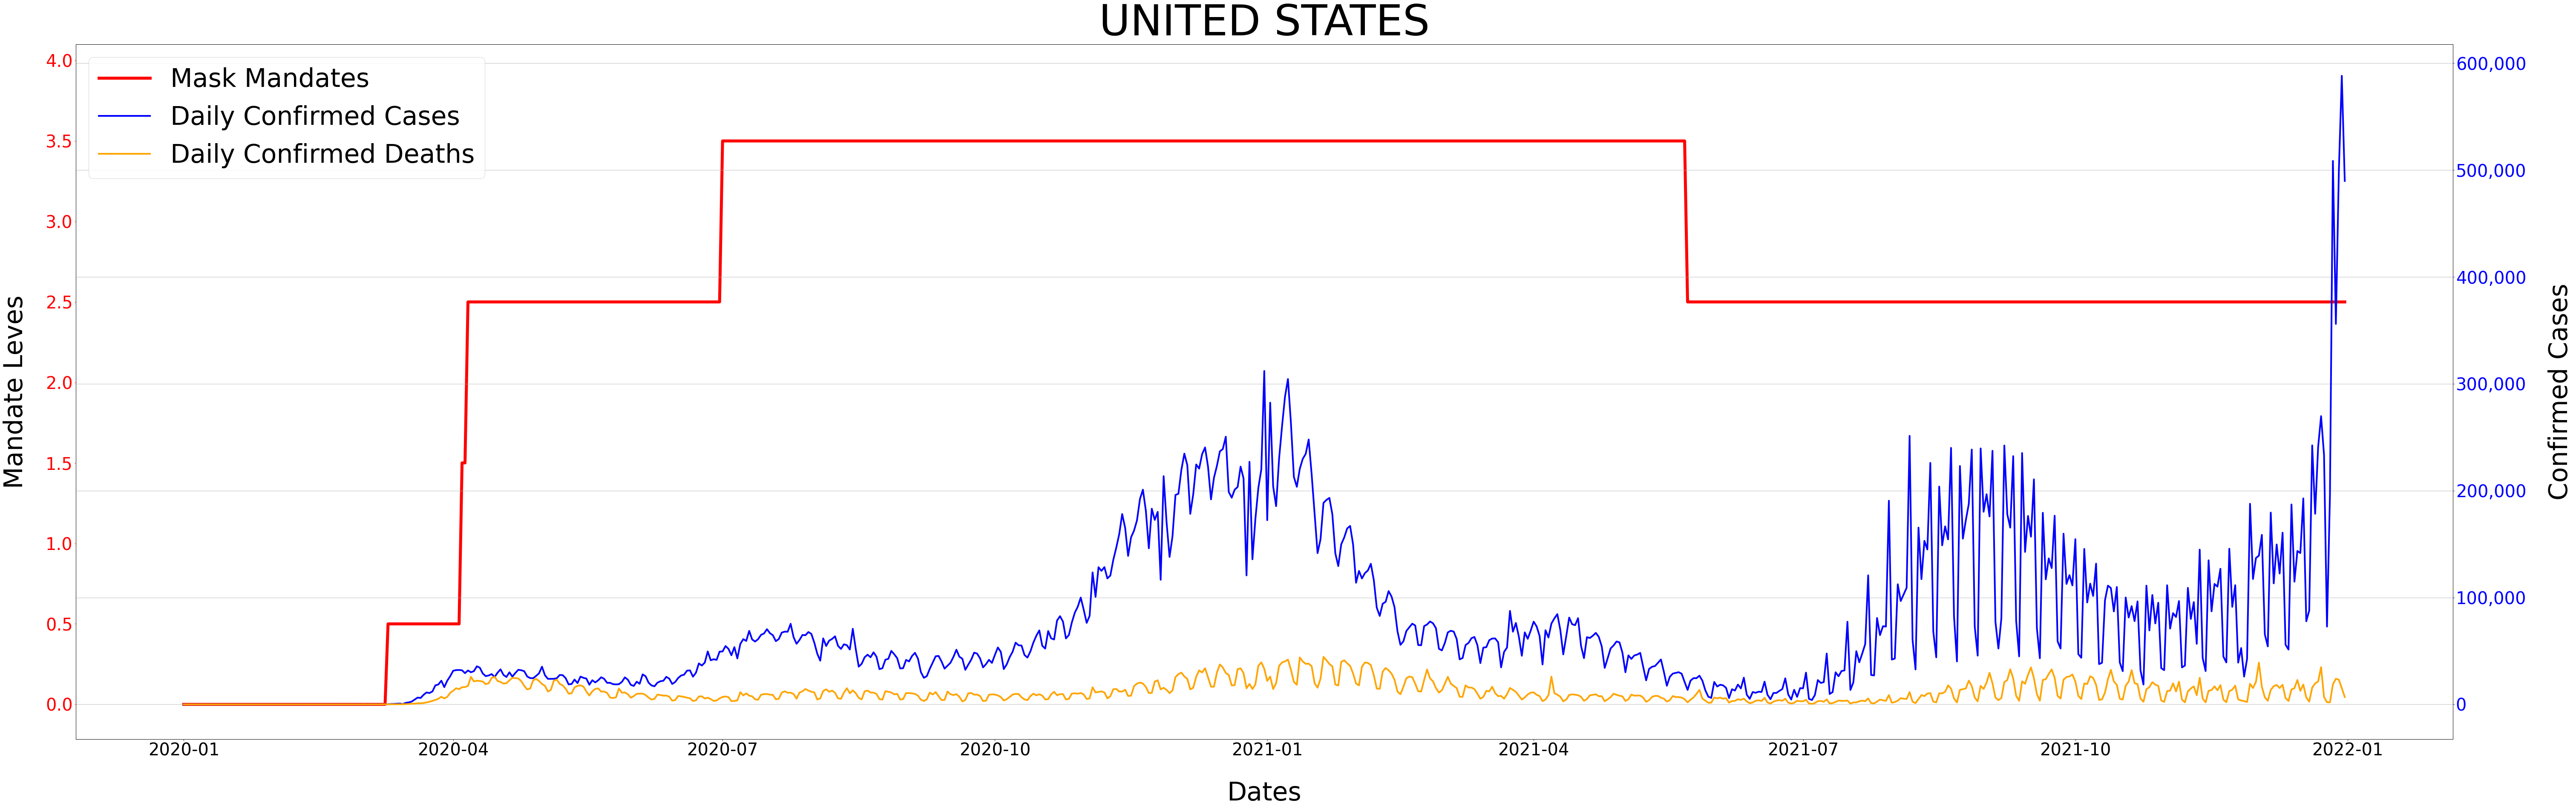

In [10]:
usa_df = data_six.loc[data_six['CountryName'].isin(['United States'])]
usa_df['daily_cases'] =usa_df['ConfirmedCases'].diff()
usa_df['daily_cases'] =usa_df['daily_cases'].fillna(0)
usa_df['daily_deaths']=usa_df['ConfirmedDeaths'].diff()
usa_df['daily_deaths'] =usa_df['daily_deaths'].fillna(0)
usa_df['daily_deaths'] =usa_df['daily_deaths']*10

x1_usa = usa_df[['H6_combined_numeric']]
x2_usa = usa_df[['daily_cases']]
x3_usa = usa_df[['daily_deaths']]
dates_usa = usa_df[['Date']]

fig, ax = plt.subplots(figsize=(100, 30))
ax.plot(dates_usa,x1_usa,linewidth=7,color="r",label='Mask Mandates')
ax.tick_params('y',colors='r',labelsize=40)
ax.tick_params('x',color='k',labelsize=40)
ax.set_title('UNITED STATES',fontsize = 100)
ax.set_xlabel('Dates', fontsize=60)
ax.xaxis.set_label_coords(.5, -.06)
ax.set_ylabel('Mandate Leves', fontsize=60)
ax.yaxis.set_label_coords(-0.02, .5)
ax.set_facecolor('xkcd:white')
ax.set_ylim(top = 4.1)



ax2 =ax.twinx()
rct1 = ax2.plot(dates_usa,x2_usa,linewidth=4,color="b",label='Daily Confirmed Cases')
rct2 = ax2.plot(dates_usa,x3_usa,linewidth=4,color="orange",label='Daily Confirmed Deaths')
ax2.set_ylabel('Confirmed Cases', fontsize=60)
ax2.yaxis.set_label_coords(1.04, .5)
ax2.tick_params('y', colors='b',labelsize=40)
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

mpl_axes_aligner.align.yaxes(ax, 0, ax2, 0, 0.05)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best',fontsize=60)
ax2.grid(True)
plt.savefig("Plots with Deads/United States_1.png")

# United States_ 2

In [11]:
# usa_df = data_six.loc[data_six['CountryName'].isin(['United States'])]
# usa_df['daily_cases'] =usa_df['ConfirmedCases'].diff()
# usa_df['daily_cases'] =usa_df['daily_cases'].fillna(0)
# usa_df['daily_deaths']=usa_df['ConfirmedDeaths'].diff()
# usa_df['daily_deaths'] =usa_df['daily_deaths'].fillna(0)

# x1_usa = usa_df[['H6_combined_numeric']]
# x2_usa = usa_df[['daily_cases']]
# x3_usa = usa_df[['daily_deaths']]
# dates_usa = usa_df[['Date']]

# plt.figure(figsize=(100, 20),labelsize=100)

# host = host_subplot(111, axes_class=axisartist.Axes)
# plt.subplots_adjust(right=0.75)


# par1 = host.twinx()
# par2 = host.twinx()

# par2.axis["right"] = par2.new_fixed_axis(loc="right", offset=(60, 0))

# par1.axis["right"].toggle(all=True)
# par2.axis["right"].toggle(all=True)

# p1, = host.plot(dates_usa,x1_usa,linewidth=7,color="r",label='Mask Mandates')
# p2, = par1.plot(dates_usa,x2_usa,linewidth=4,color="b",label='Daily Confirmed Cases')
# p3, = par2.plot(dates_usa,x3_usa,linewidth=4,color="orange",label='Daily Confirmed Deaths')

# # host.set_xlim(top = 4.1)
# host.set_ylim(top = 4.1)
# # par1.set_ylim(0, 4)
# # par2.set_ylim(1, 65)

# host.set_xlabel("Dates")

# host.set_ylabel("Mask Mandates")

# par1.set_ylabel("Daily Confirmed Cases")

# par2.set_ylabel("Daily Confirmed Deaths")
# par2.tick_params('y', colors='b',labelsize=100)
# host.legend(loc='upper left')

# host.axis["left"].label.set_color(p1.get_color())
# par1.axis["right"].label.set_color(p2.get_color())
# par2.axis["right"].label.set_color(p3.get_color())
# plt.savefig("United States3.png")
# plt.show()

# CANADA

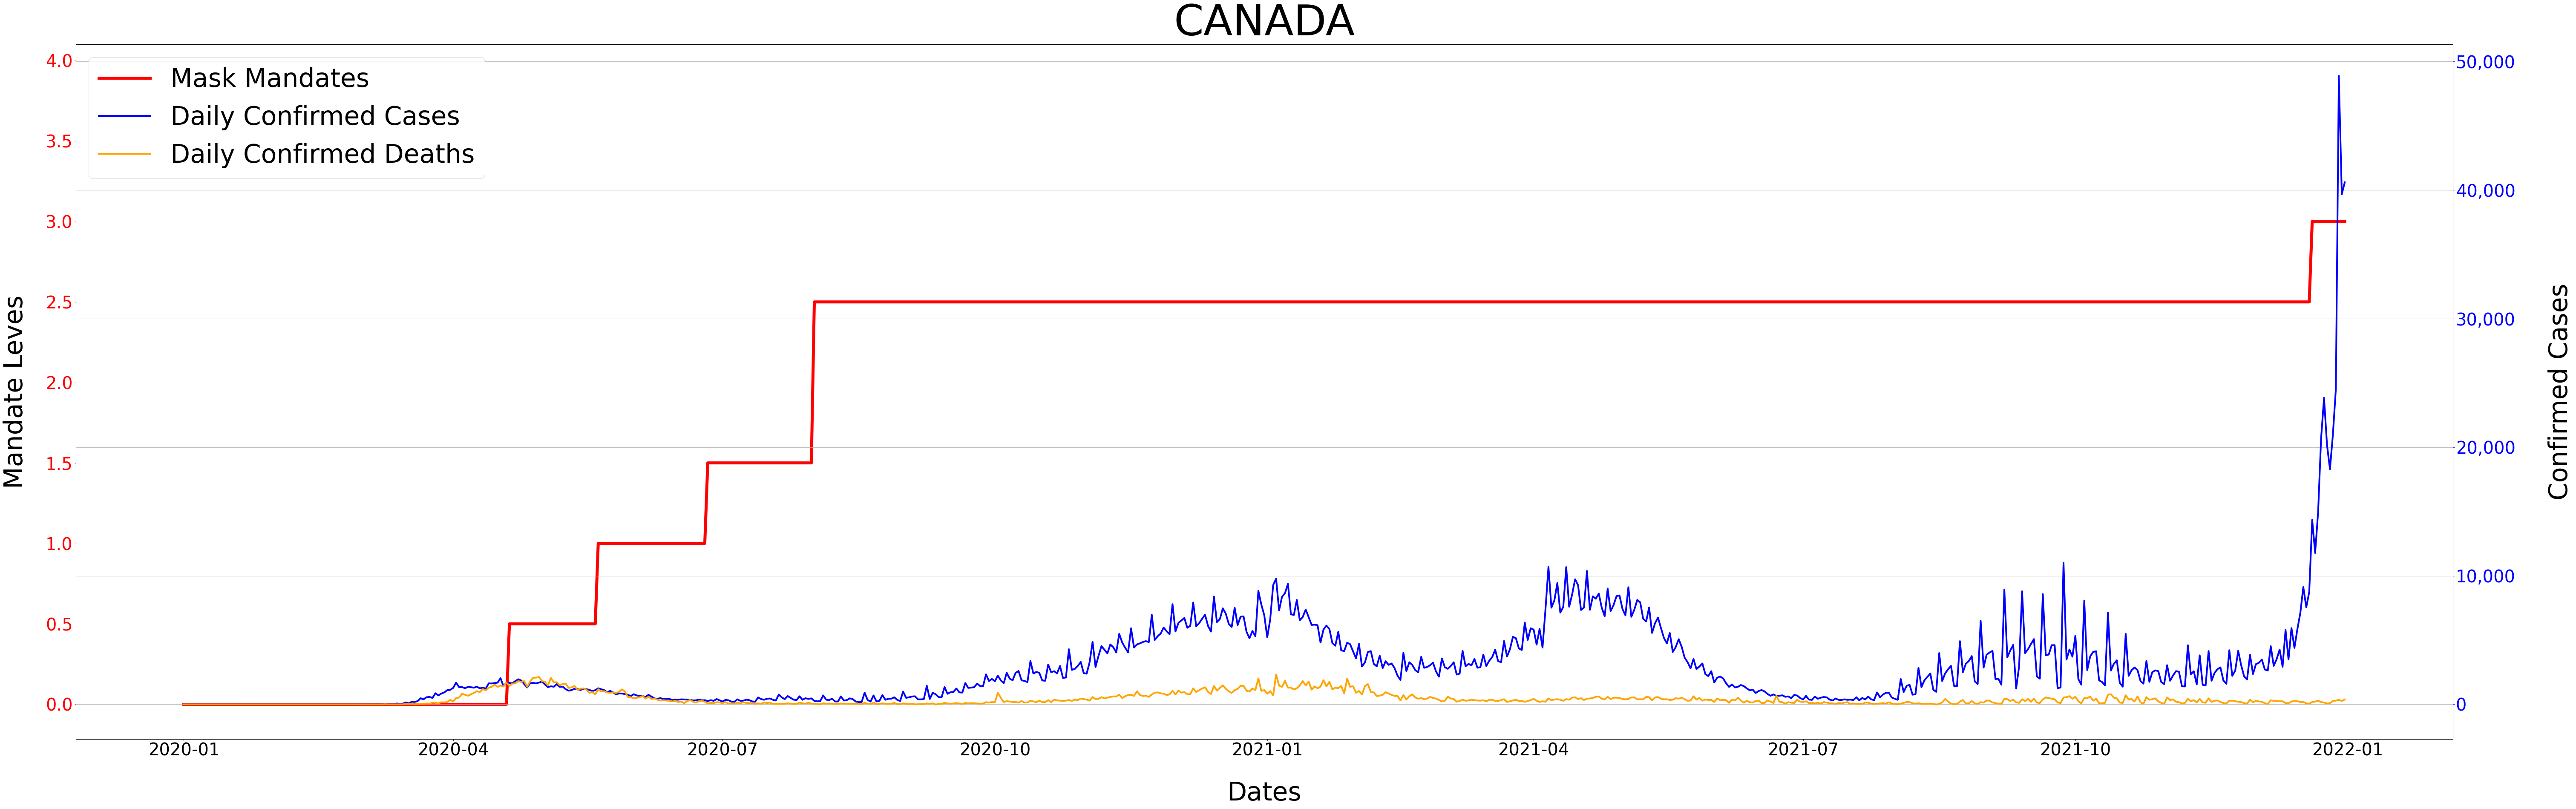

In [12]:
can_df = data_six.loc[data_six['CountryName'].isin(['Canada'])]
can_df['daily_cases'] =can_df['ConfirmedCases'].diff()
can_df['daily_cases'] =can_df['daily_cases'].fillna(0)
can_df['daily_deaths']=can_df['ConfirmedDeaths'].diff()
can_df['daily_deaths'] =can_df['daily_deaths'].fillna(0)
can_df['daily_deaths'] =can_df['daily_deaths']*10

x1_can = can_df[['H6_combined_numeric']]
x2_can = can_df[['daily_cases']]
x3_can = can_df[['daily_deaths']]
dates_can = can_df[['Date']]

fig, ax = plt.subplots(figsize=(100, 30))
ax.plot(dates_can,x1_can,linewidth=7,color="r",label='Mask Mandates')
ax.tick_params('y',colors='r',labelsize=40)
ax.tick_params('x',color='k',labelsize=40)
ax.set_title('CANADA',fontsize = 100)
ax.set_xlabel('Dates', fontsize=60)
ax.xaxis.set_label_coords(.5, -.06)
ax.set_ylabel('Mandate Leves', fontsize=60)
ax.yaxis.set_label_coords(-0.02, .5)
ax.set_facecolor('xkcd:white')
ax.set_ylim(top = 4.1)

ax2 =ax.twinx()
rct1 = ax2.plot(dates_can,x2_can,linewidth=4,color="b",label='Daily Confirmed Cases')
rct2 = ax2.plot(dates_can,x3_can,linewidth=4,color="orange",label='Daily Confirmed Deaths')
ax2.set_ylabel('Confirmed Cases', fontsize=60)
ax2.yaxis.set_label_coords(1.04, .5)
ax2.tick_params('y', colors='b',labelsize=40)
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

mpl_axes_aligner.align.yaxes(ax, 0, ax2, 0, 0.05)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best',fontsize=60)
ax2.grid(True)
plt.savefig("Plots with Deads/Canada_1.png")

# GERMANY

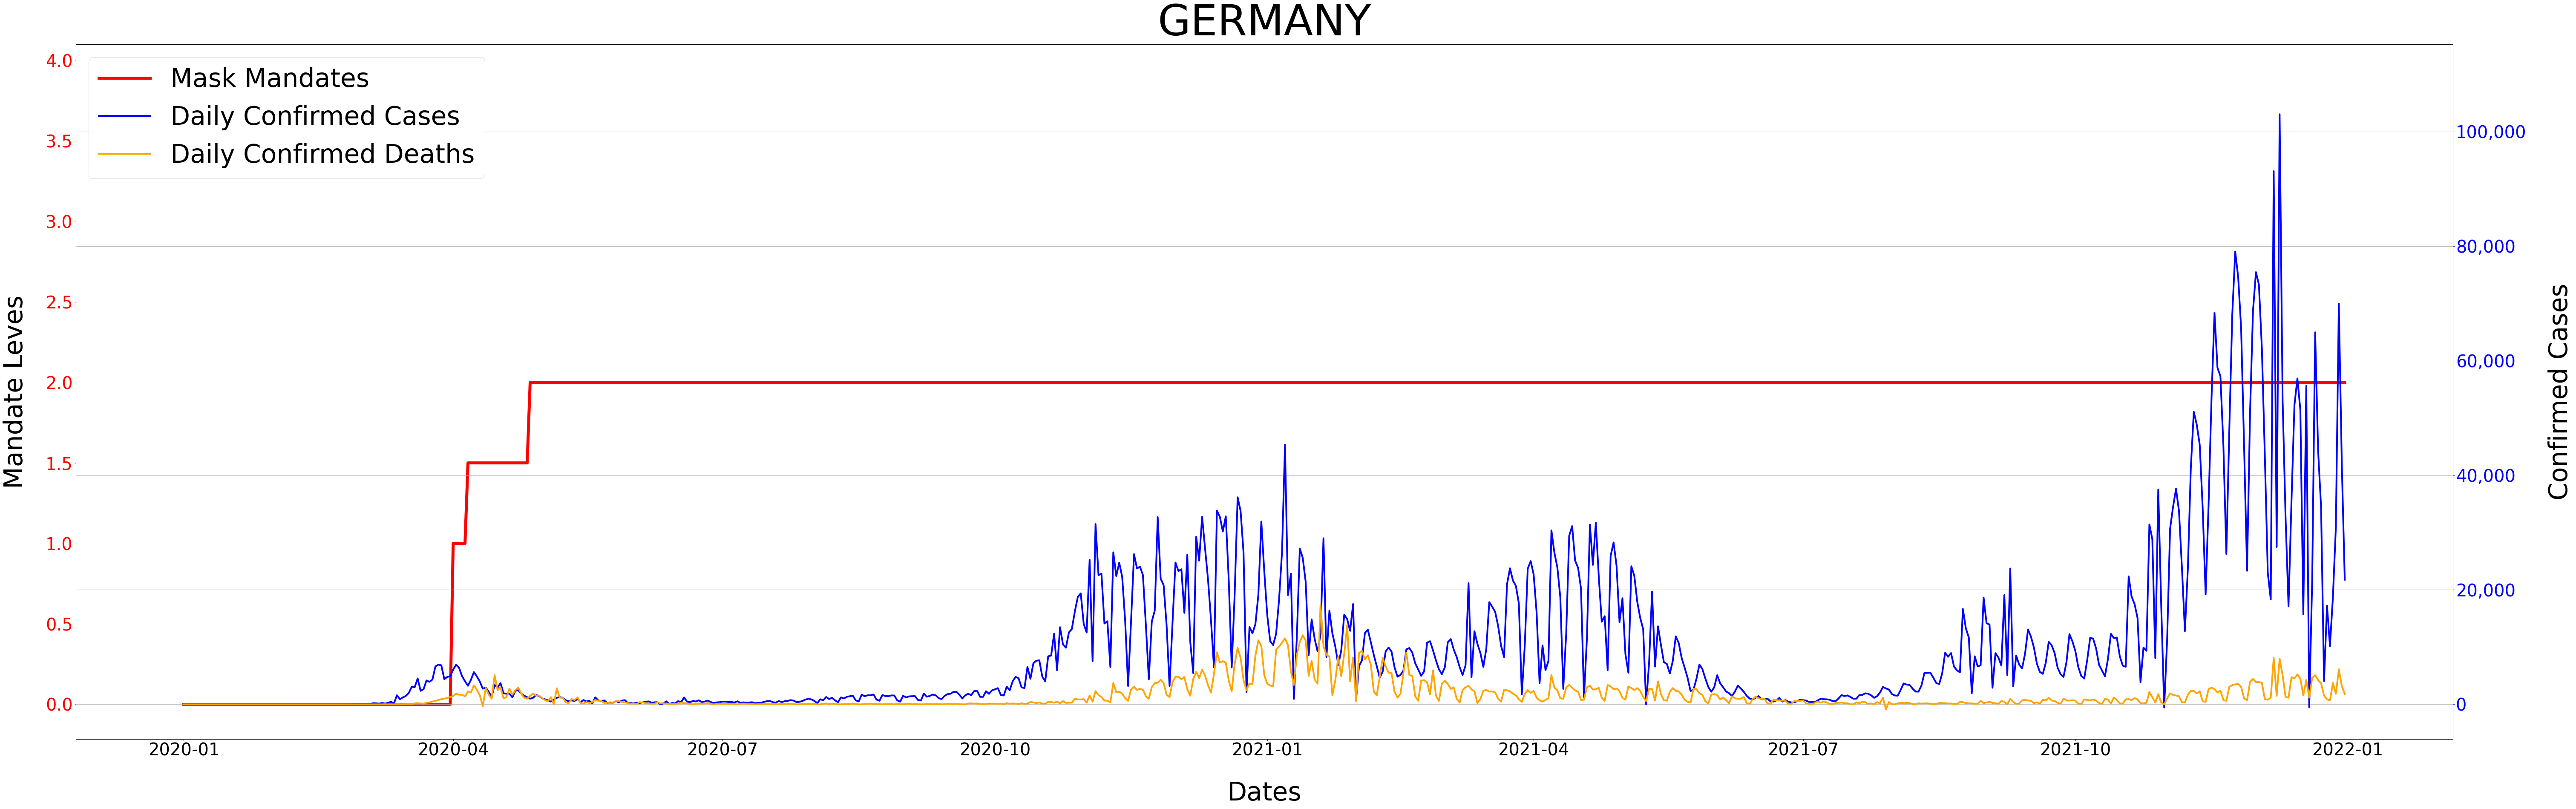

In [13]:
ger_df = data_six.loc[data_six['CountryName'].isin(['Germany'])]
ger_df['daily_cases'] =ger_df['ConfirmedCases'].diff()
ger_df['daily_cases'] =ger_df['daily_cases'].fillna(0)
ger_df['daily_deaths']=ger_df['ConfirmedDeaths'].diff()
ger_df['daily_deaths'] =ger_df['daily_deaths'].fillna(0)
ger_df['daily_deaths'] =ger_df['daily_deaths']*10


x1_ger = ger_df[['H6_combined_numeric']]
x2_ger = ger_df[['daily_cases']]
x3_ger = ger_df[['daily_deaths']]
dates_ger = ger_df[['Date']]

fig, ax = plt.subplots(figsize=(100, 30))
ax.plot(dates_ger,x1_ger,linewidth=7,color="r",label='Mask Mandates')
ax.tick_params('y',colors='r',labelsize=40)
ax.tick_params('x',color='k',labelsize=40)
ax.set_title('GERMANY',fontsize = 100)
ax.set_xlabel('Dates', fontsize=60)
ax.xaxis.set_label_coords(.5, -.06)
ax.set_ylabel('Mandate Leves', fontsize=60)
ax.yaxis.set_label_coords(-0.02, .5)
ax.set_facecolor('xkcd:white')
ax.set_ylim(top = 4.1)


ax2 =ax.twinx()
rct1 = ax2.plot(dates_ger,x2_ger,linewidth=4,color="b",label='Daily Confirmed Cases')
rct2 = ax2.plot(dates_ger,x3_ger,linewidth=4,color="orange",label='Daily Confirmed Deaths')
ax2.set_ylabel('Confirmed Cases', fontsize=60)
ax2.yaxis.set_label_coords(1.04, .5)
ax2.tick_params('y', colors='b',labelsize=40)
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

mpl_axes_aligner.align.yaxes(ax, 0, ax2, 0, 0.05)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='best',fontsize=60)
ax2.grid(True)
plt.savefig("Plots with Deads/Germany_1.png")

# JAPAN

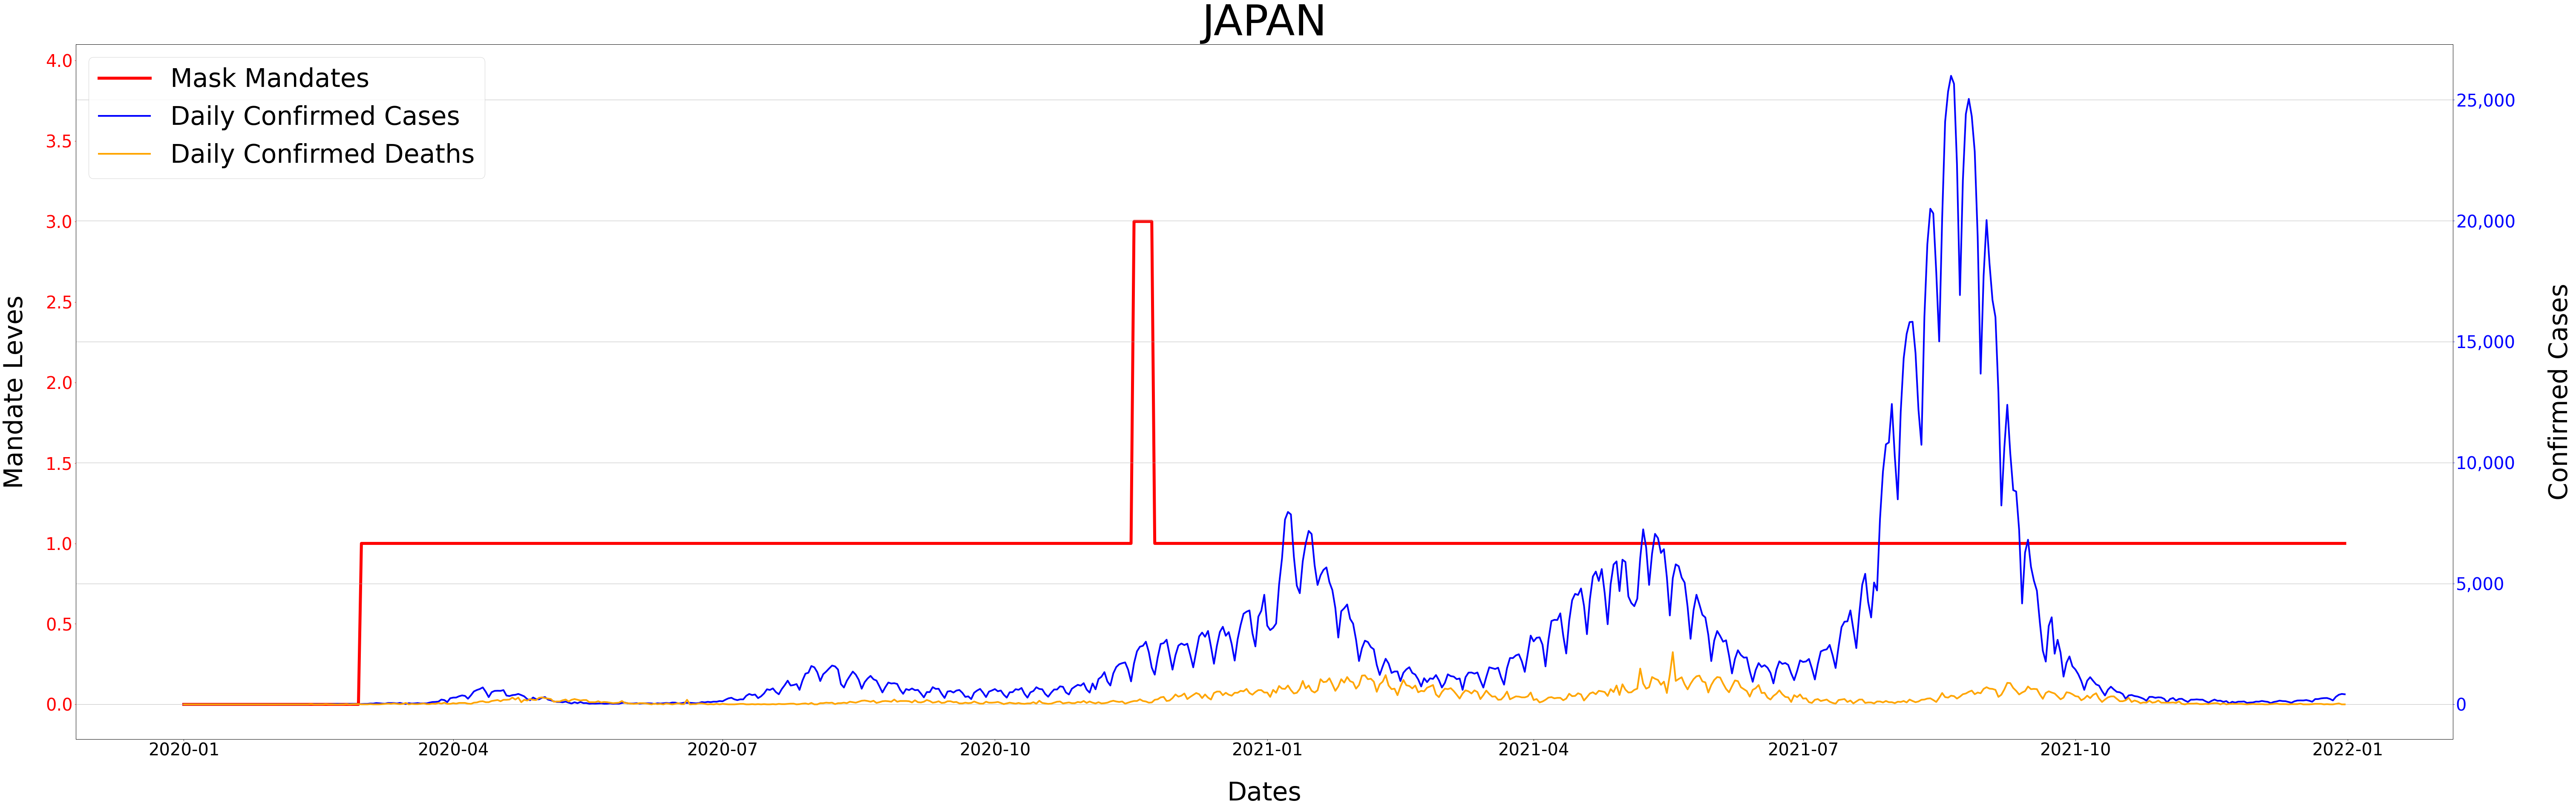

In [14]:
jap_df = data_six.loc[data_six['CountryName'].isin(['Japan'])]
jap_df['daily_cases'] =jap_df['ConfirmedCases'].diff()
jap_df['daily_cases'] =jap_df['daily_cases'].fillna(0)
jap_df['daily_deaths']=jap_df['ConfirmedDeaths'].diff()
jap_df['daily_deaths'] =jap_df['daily_deaths'].fillna(0)
jap_df['daily_deaths'] =jap_df['daily_deaths']*10

x1_jap = jap_df[['H6_combined_numeric']]
x2_jap = jap_df[['daily_cases']]
x3_jap = jap_df[['daily_deaths']]
dates_jap = jap_df[['Date']]

fig, ax = plt.subplots(figsize=(100, 30))
ax.plot(dates_jap,x1_jap,linewidth=7,color="r",label='Mask Mandates')
ax.tick_params('y',colors='r',labelsize=40)
ax.tick_params('x',color='k',labelsize=40)
ax.set_title('JAPAN',fontsize = 100)
ax.set_xlabel('Dates', fontsize=60)
ax.xaxis.set_label_coords(.5, -.06)
ax.set_ylabel('Mandate Leves', fontsize=60)
ax.yaxis.set_label_coords(-0.02, .5)
ax.set_facecolor('xkcd:white')
ax.set_ylim(top = 4.1)


ax2 =ax.twinx()
rct1 = ax2.plot(dates_jap,x2_jap,linewidth=4,color="b",label='Daily Confirmed Cases')
rct2 = ax2.plot(dates_jap,x3_jap,linewidth=4,color="orange",label='Daily Confirmed Deaths')
ax2.set_ylabel('Confirmed Cases', fontsize=60)
ax2.yaxis.set_label_coords(1.04, .5)
ax2.tick_params('y', colors='b',labelsize=40)
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

mpl_axes_aligner.align.yaxes(ax, 0, ax2, 0, 0.05)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left',fontsize=60)
ax2.grid(True)
plt.savefig("Plots with Deads/Japan_1.png")

# INDIA

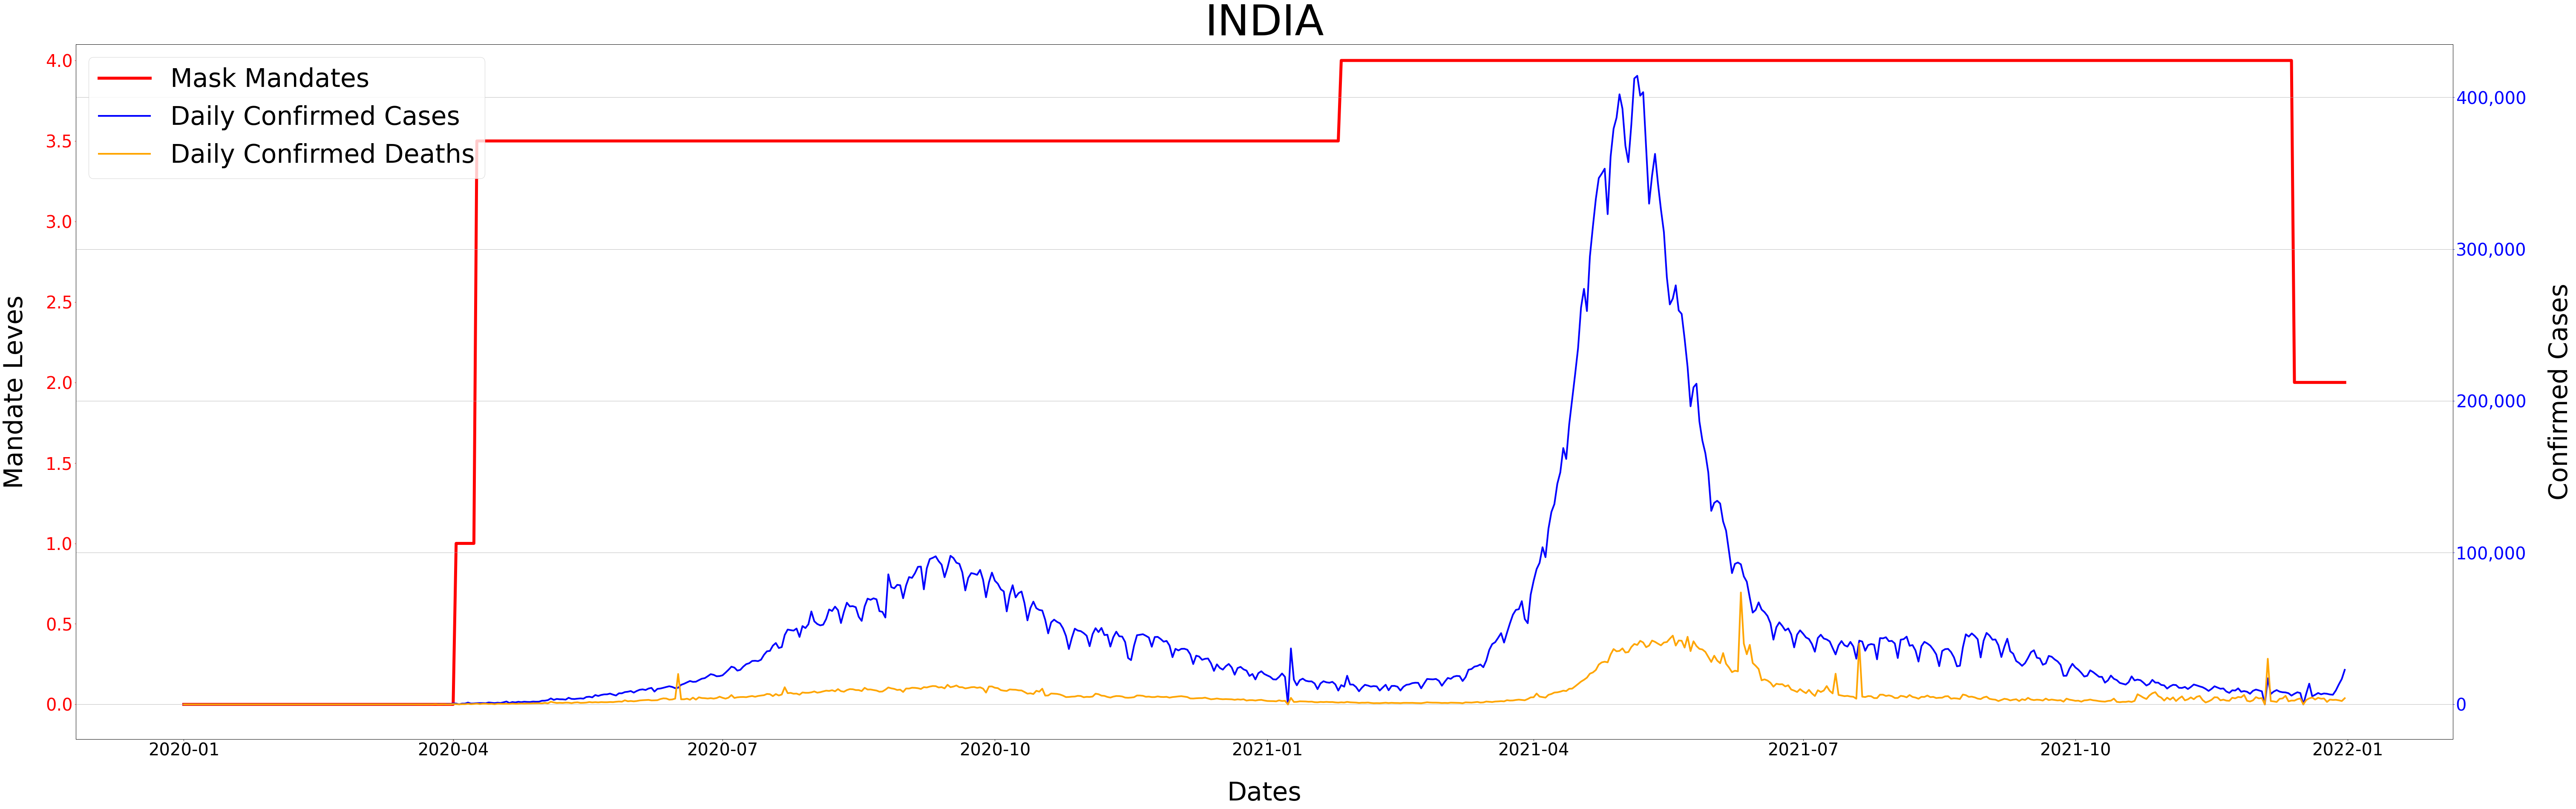

In [15]:
ind_df = data_six.loc[data_six['CountryName'].isin(['India'])]
ind_df['daily_cases'] =ind_df['ConfirmedCases'].diff()
ind_df['daily_cases'] =ind_df['daily_cases'].fillna(0)
ind_df['daily_deaths']=ind_df['ConfirmedDeaths'].diff()
ind_df['daily_deaths'] =ind_df['daily_deaths'].fillna(0)
ind_df['daily_deaths'] =ind_df['daily_deaths']*10

x1_ind = ind_df[['H6_combined_numeric']]
x2_ind = ind_df[['daily_cases']]
x3_ind = ind_df[['daily_deaths']]
dates_ind = ind_df[['Date']]

fig, ax = plt.subplots(figsize=(100, 30))
ax.plot(dates_ind,x1_ind,linewidth=7,color="r",label='Mask Mandates')
ax.tick_params('y',colors='r',labelsize=40)
ax.tick_params('x',color='k',labelsize=40)
ax.set_title('INDIA',fontsize = 100)
ax.set_xlabel('Dates', fontsize=60)
ax.xaxis.set_label_coords(.5, -.06)
ax.set_ylabel('Mandate Leves', fontsize=60)
ax.yaxis.set_label_coords(-0.02, .5)
ax.set_facecolor('xkcd:white')
ax.set_ylim(top = 4.1)

ax2 =ax.twinx()
rct1 = ax2.plot(dates_ind,x2_ind,linewidth=4,color="b",label='Daily Confirmed Cases')
rct2 = ax2.plot(dates_ind,x3_ind,linewidth=4,color="orange",label='Daily Confirmed Deaths')
ax2.set_ylabel('Confirmed Cases', fontsize=60)
ax2.yaxis.set_label_coords(1.04, .5)
ax2.tick_params('y', colors='b',labelsize=40)
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

mpl_axes_aligner.align.yaxes(ax, 0, ax2, 0, 0.05)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left',fontsize=60)
ax2.grid(True)
plt.savefig("Plots with Deads/India_1.png")

# SWEDEN

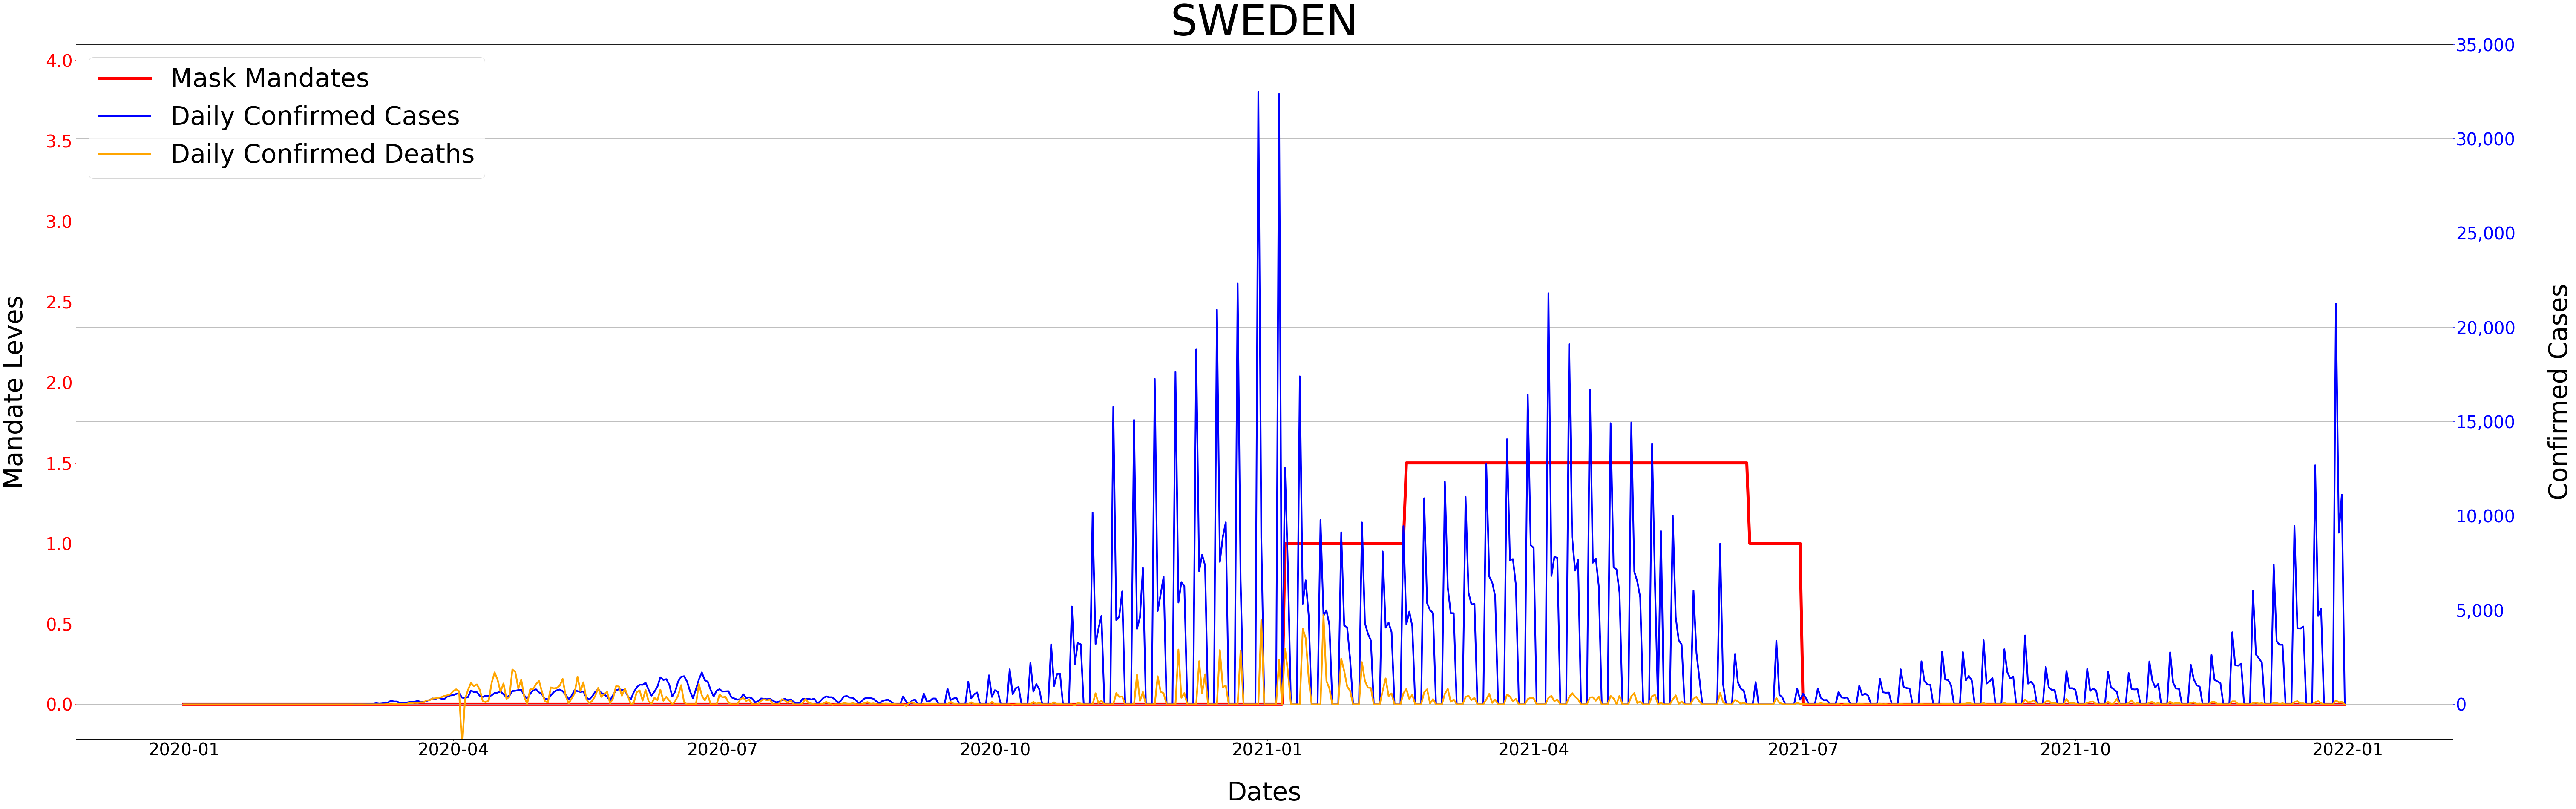

In [19]:
swe_df = data_six.loc[data_six['CountryName'].isin(['Sweden'])]
swe_df['daily_cases'] =swe_df['ConfirmedCases'].diff()
swe_df['daily_cases'] =swe_df['daily_cases'].fillna(0)
swe_df['daily_deaths']=swe_df['ConfirmedDeaths'].diff()
swe_df['daily_deaths'] =swe_df['daily_deaths'].fillna(0)
swe_df['daily_deaths'] =swe_df['daily_deaths']*10



x1_swe = swe_df[['H6_combined_numeric']]
x2_swe = swe_df[['daily_cases']]
x3_swe = swe_df[['daily_deaths']]
dates_swe = swe_df[['Date']]

fig, ax = plt.subplots(figsize=(100, 30))
ax.plot(dates_swe,x1_swe,linewidth=7,color="r",label='Mask Mandates')
ax.tick_params('y',colors='r',labelsize=40)
ax.tick_params('x',color='k',labelsize=40)
ax.set_title('SWEDEN',fontsize = 100)
ax.set_xlabel('Dates', fontsize=60)
ax.xaxis.set_label_coords(.5, -.06)
ax.set_ylabel('Mandate Leves', fontsize=60)
ax.yaxis.set_label_coords(-0.02, .5)
ax.set_facecolor('xkcd:white')
ax.set_ylim(top = 4.1)

ax2 =ax.twinx()
ax2.set_ylim(top = 35000)
rct1 = ax2.plot(dates_swe,x2_swe,linewidth=4,color="b",label='Daily Confirmed Cases')
rct2 = ax2.plot(dates_swe,x3_swe,linewidth=4,color="orange",label='Daily Confirmed Deaths')
ax2.set_ylabel('Confirmed Cases', fontsize=60)
ax2.yaxis.set_label_coords(1.04, .5)
ax2.tick_params('y', colors='b',labelsize=40)
ax2.yaxis.set_major_formatter(mtick.StrMethodFormatter('{x:,.0f}'))

mpl_axes_aligner.align.yaxes(ax, 0, ax2, 0, 0.05)

lines, labels = ax.get_legend_handles_labels()
lines2, labels2 = ax2.get_legend_handles_labels()
ax2.legend(lines + lines2, labels + labels2, loc='upper left',fontsize=60)
ax2.grid(True)
plt.savefig("Plots with Deads/Sweden_1.png")